Assignment 3
==============

This programme will be taking some function f(x), and through various methods, calculate the Integral between a, b. We will start off with the traditional method, the same one to which integration is often introduced as a concept with the rectangular box method. We will then import a module to perform the integral for us, in order to check the accuracy of our Numerical Method. Finally we will use whats called the Monte Carlo Method, and do some analysis to its accuracy.  
  
For this case we will be using an intgral from Quantum Mechanics, that will give the probability of finding of finding a particale in a unit wide well, in the left third side of the well. The integral is:

$$ P = \int_0^{1/3}2sin^2{\pi x}$$

From now we will call the inside function the wavefunction, and the evaluation as the integral, area etc..  
  
    
  
For the first Task, we will only need to def the function of the wavefunction in python, along with a numerical integral function that will perform our rectangular box method for estimating the integral.
  
For the second Task, we just use the scipy import to find an accurate value for the integral.
  
For the third Task, we will use:
$$ \eta = \frac{\lvert measured - expected\rvert}{expected}$$
To find the relative accuracy of our estimation. To find the order $N$, whcih goes by $\eta = \alpha n^{-N}$ of our method with alpha a constant, we can take 2 values of $\eta _i$ and number of iterations $n_i$, to find:
$$ \alpha = \eta _1 n_1^{N} $$
$$ N = log_{\frac{n_1}{n_2}}(\frac{\eta _2}{\eta_1}) $$ $$ N = \frac{ln(\frac{\eta _2}{\eta_1})}{ln(\frac{n_1}{n_2})}$$
Now we this we can find multiple values for the order, and averge them together. We will also start to use some kwargs, this is simply to add custimability to the programme, rather than it be a requirment to finish the task. Specifically we will use it for passing in boolian values so the function only performs an action (plotting) when asked, and to provide strings of names not always needed.  
  
    
For the forth Task, we will be defining the Monte Carlo Method, and analysing it. This method of estimation revolves around the concept that if we pick a random point on a plot and decide if its under the curve (success) and repeat for a large number of trys, the ratio of success to total trials, will be the same as the ratio of area under the graph and the total area of the plot.

### Task 1 ###  
1. As always we import numpy and matplotlib.pyplot, but now we are also importing scipy.integrate, in order to get an accurate value of the integral in Task 2, and also random for part 4 with the Monte Carlo method.
2. Next we set our programme constants. These are specifically numbers that stay contsant throughout one run of the programme, and are clumped here at the start to allow for easy access in order to change them when twicking the outputs.
3. Now we begin defining our functions. First up is the numerical integration. We need to take in 4 variables, the function fx, the min and max values, the number of boxs we want to use, i.e. the number of steps. We create an interval along between the min and max, of n+1 steps, and then find f(x) for the left hand side of each interval. We add the area of this new box to our running sum, and repeat throughout the inteval. Return the total area found. Second we define the wavefunction, which is just a simply mathimatical statement.
4. We print our Results.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as scig
import random as rdm



#Programme constants
x_initial = 0
x_final = 1/3
num_n = 10000                    #The number of boxs in our Numerical Integral
monte_n = 10000                  #Number of random guess' in the Monte Carlo Method
eta_iter = 4                     #The number of variations of iterations (10, 100, 1000 ...) for the accuracy test
lin_min = 100                    #Min in the linear array
lin_max = 10000                  #Max in the linear array


#Function Definitions
def numerical_integral(fx, xmin, xmax, n, **kwargs):
    #Uses the rectangle rule to find an estimate for the area under a curve f(x)
    interval = np.linspace(xmin, xmax, int(n) + 1)
    Area = 0
    for i in range(1, int(n)):
        h = fx(interval[i-1])
        Area += (interval[i] - interval[i-1]) * h
    
    return Area


def wavefunction(x):
    f_x = 2 * ((np.sin(x * np.pi)) ** 2)
    return f_x

num_est = numerical_integral(wavefunction, x_initial, x_final, num_n) 
print('The estimate for the Integral using the rectangle rule with {0} segments, is: {1:.4}'.format(num_n, num_est))


The estimate for the Integral using the rectangle rule with 10000 segments, is: 0.1954


### Task 2 ###
1. We evaluate the integral using scipy and print the value plus or minus its uncertainty, which is very very low.

In [2]:
scipy_integral, scipy_uncertainty = scig.quad(wavefunction, x_initial, x_final)
print('Using Scipy, we get the integral to be : {0:.4} +- {1:.4}'.format(scipy_integral, scipy_uncertainty))



Using Scipy, we get the integral to be : 0.1955 +- 2.17e-15


### Task 3 ####
1. First we want to build our function that will find the eta for a number of different iterations. We take in our function f(x), the method we are finding the accuracy for, along with min, max, and array of values for iterations. We can loop through these finding their corresponding $\eta$ value, and then we check for kwargs. If we have eta_plot and its True, we plot the iterations vs the $\eta$ and then check for x_scale, if its there we use its value for the scale, otherwords we assign linear to its value. We also check for a name, so that we can add a title to the plot.
2. Next we want to find the order, but again we check if its specified and then we loop through all pairs of values of $\eta _1 , \eta _2$ find the order and then the average.
3. Finally we define two arrays, one a linear increase from lin_min to lin max, and the other the powers of ten starting at 100.

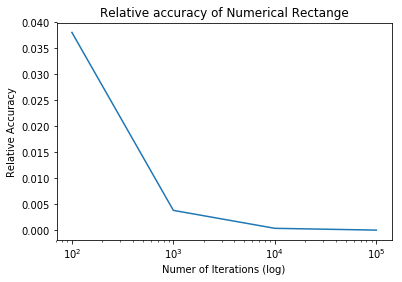

The order of the Numerical Rectange method was: 0.9988022528610867


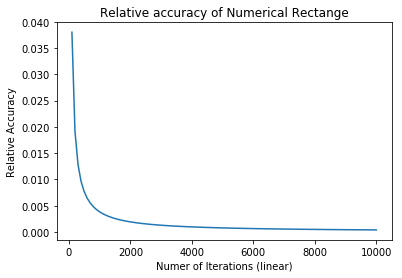

In [3]:
def Eta_Accuracy(fx, function_estimate, xmin, xmax, iterations=[1], *, eta_plot=False, order=False, **kwargs):
    #Finds the value of Relative Accuracy for a given function and Integral with the expected result, returns an array of the iterations, the eta values for each iteration 
    iter_len = len(iterations)        #In the arguments, we have a * as one. This designates that anything after it is a 
    eta = np.zeros(iter_len)          #kwarg, so we set the boolian kwargs intitally as false
    function_actual, scipy_uncertainty = scig.quad(fx, xmin, xmax)          #Performs the scipy function for this f(x) 
    for i in range(iter_len):
        eta[i] = abs(function_estimate(fx, xmin, xmax, iterations[i]) - function_actual) / function_actual  
        
                              
    if eta_plot:                    #Checks if set to True
        plt.plot(iterations, eta)
            
        if 'x_scale' in kwargs:                   #Same as above
            plt.xscale(kwargs.get('x_scale'))     
        else:
            kwargs['x_scale'] = 'linear'          #Couldn't set a default value for this kwarg, so this does it for you, if necessary
            
        if 'name' in kwargs:
            plt.title('Relative accuracy of {}'.format(kwargs.get('name')))
            
        plt.xlabel('Numer of Iterations ({})'.format(kwargs.get('x_scale')))
        plt.ylabel('Relative Accuracy')            
        plt.show()                                #All just formating, the same as most other code
    
    
    if order:
        function_order = 0                        #We want to find N for each i, j pair, but
        for i in range(iter_len):                 #as ii is not allowed and ij = ji then we
            for j in range (iter_len):            #insit that i be less than j, grabbing each pari only once
                if i < j:      
                    function_order += (np.log(eta[j]/eta[i]))/(np.log(iterations[i]/iterations[j])) 
                                                      #See markdown for equation
        function_order /= ((iter_len - 1) * (iter_len / 2))               #This is just deviding by number of pairs we have
        if 'name' in kwargs:                      #which is the sum from iter_len - 1 down to 1.
            print('The order of the {} method was: {}'.format(kwargs.get('name'), function_order)) 
        return iterations, eta, function_order    #Only returns function order when asked for it
    return iterations, eta




#Definging Arrays
linear = np.linspace(lin_min, lin_max, (int(lin_max/lin_min) + 1))
factors_10 = np.zeros(eta_iter)
for i in range(0, eta_iter):
    factors_10[i] = 10**(i+2)
    
        
        
        
        

it, eta, N, = Eta_Accuracy(wavefunction, numerical_integral, x_initial, x_final, factors_10, eta_plot=True, name='Numerical Rectange', x_scale='log', order=True)
it, eta     = Eta_Accuracy(wavefunction, numerical_integral, x_initial, x_final, linear, eta_plot=True, name='Numerical Rectange')


We get an order of very close to 1, and when we plot the linear we can see $\eta$ and iterations goes like $\eta = n^{-1}$

### Task 4 ###
1. Now we want to define the Monte Carlo method as a function. In the same format as the Numerical Integral above, we have fx then xmin, xmax and trials, this allows us to interchange these two functions at any place the other is used. We also set up our boolian kwargs as intitally False.
2. Starting off we create an array of x,y values for fx, along with its min and max y values. We define empty lists for x, y, where all of the succesful trials go into xlist, ylist, and failed gp into x2list, y2list (this will allow us to plot a scatter plot of them.
3. We find the total are of the plot and begin our random trials. We need to find a random x **and** y value in their ranges, and then check if the y random is below the curve. Doing this over the number of trials specified we can then (if the kwarg is set to true) plot both the success' and the failures along with f(x) on the same plot.

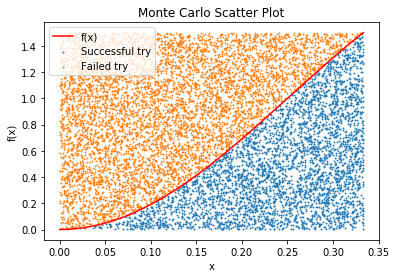

Using the Monte Carlo Method with 10000 trials, we have area: 0.1957


In [4]:
def monte_carlo(fx, xmin, xmax, trials, *, monte_print=False, func_plot=False, **kwargs):
    #Estimating the integral using random number generations
    xval = np.linspace(xmin, xmax, 1000)
    yval = fx(xval)
    
    ymin = min(yval)
    ymax = max(yval)
    
    xlist= []
    ylist= []
    x2list=[]
    y2list=[]
    
    box_area = (ymax - ymin) * (xmax - xmin) 
    success = 0
    
    for i in range(int(trials)):
        xrdm = rdm.uniform(xmin, xmax)
        yrdm = rdm.uniform(ymin, ymax)
        
        if yrdm <= fx(xrdm):
            success += 1
            xlist.append(xrdm)
            ylist.append(yrdm)
        else:
            x2list.append(xrdm)
            y2list.append(yrdm)
  
    
    if func_plot:
        plt.plot(xval,yval, 'r', label='f(x)')
        plt.title('Monte Carlo Scatter Plot')
        plt.scatter(xlist, ylist, s=.75, label='Successful try')
        plt.scatter(x2list, y2list,s=.75, label='Failed try')
        plt.xlabel('x')
        plt.ylabel('f(x)')
        plt.legend()
        plt.show()
    
        
    monte_estimate = (success/trials) * box_area
    if monte_print:
        print('Using the Monte Carlo Method with {0} trials, we have area: {1:.4}'.format(trials, monte_estimate))

    return monte_estimate
        

monte_est = monte_carlo(wavefunction, x_initial, x_final, monte_n, func_plot=True, monte_print=True)        




Finally we are just doing 5 plots of the Monte Carlo Method, to visualize how changing the number of trials will changethe outcome. First we perform the same Eta Accuracy plot as we did for the Numerical Method above, We can see that it doesnt increase in accuracy as quickly as the Numerical did by increasing the number of trials. We see that the it is much slower.  
  
  
Then we plot 4 of the same linearly increasing iteration numbers and we can see just how random this accuracy actually is, and even at 10000 it is not quite settled into an high accuracy (accuracy is better going to 0)

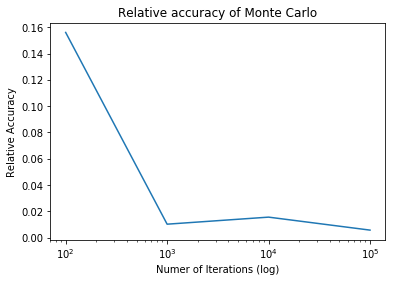

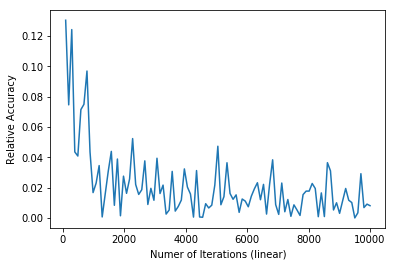

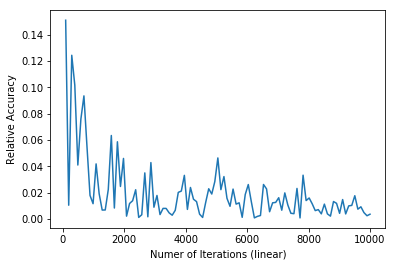

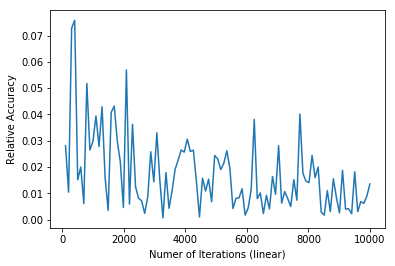

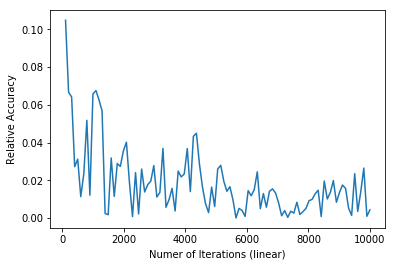

In [5]:

Eta_Accuracy(wavefunction, monte_carlo, x_initial, x_final, factors_10, monte_print=True, eta_plot=True, x_scale='log', name='Monte Carlo')
for i in range(4):
    Eta_Accuracy(wavefunction, monte_carlo, x_initial, x_final, linear, eta_plot=True, name='Monte Carlo')
